# SMARTS (SMiles ARbitrary Target Specification)
<br><br>

> 참고
* [Daylight](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)
* [RDKit](https://www.rdkit.org/)

SMARTS | SMILES
---- | ----
Molecular pattern | Molecular structure

### Introduction
* SMARTS는 SMiles ARbitrary Target Specification(임의의 목표 명시)를 의미한다.
* 분자의 패턴이나 성질을 표현하기 위한 언어이다.
* SMILES의 연장이다
> 모든 SMILES의 symbols(atoms & bonds)과 properties(특징; 원자의 표현, 전하, 이성질체의 명시)는 SMARTS에서 유효하다<br>
 SMARTS는 logical한 연산자들과 추가적인 분자 표현자들을 포함한다.
 >> SMARTS atomic symbol [C,N]은 지방족 C 혹은 N이 될 수 있다; SMARTS의 결합 symbol인 ~은 어떤 결합고도 일치한다.
 
* 구조적 패턴을 generality(일반성)와 specificity(특수성, 특별함)의 정도로 다양하게 표현할 수 있다.
> SMILES에선 methane을 C or [CH4]로 표현할 수 있다
> High specificity SMARTS는 methane : [CH4]<br>
>> [CH4]는 4개의 수소를 갖는 지방족의 탄소 원자들과 일치된다.<br>
[CH4]는 ehtane, ethene, 혹은 cyclopentane과는 일치하지 않는다.

> Low specificity SMARTS는 methane : C<br>
>> C는 어떤 수를 가진 수소를 갖는 지방족의 탄소 원자들과 일치된다.<br>
C는 ehtane, ethene, 혹은 cyclopentane과는 일치할 수 있다.

In [1]:
#RDkit 적용
from __future__ import print_function #2.X대 python호환을 위해
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

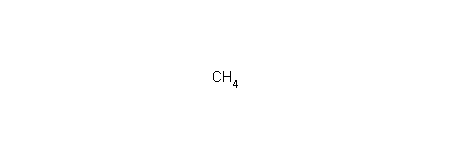

In [3]:
methane1 = AllChem.MolFromSmiles('C') #or [CH4]
methane1

### 1.Atomic Primitives
* SMARTS는 SMILES에서 사용되는 원자의 특징(원자 기호, 전하, 이성질체의 명시)보다 더 큰 범주의 많은 원자의 표현을 제공한다.
* <**n**> : 숫자 , <**c**> : chiral class

Symbol | Symbol name | Atomic property requirements | Default
---- | ---- | ----| ----
* | wildcard | any atom | (no default)
a | aromatic | aromatic | (no default)
A | aliphatic | aliphatic | (no default)
D<$n$> | degree | <$n$> explicit connections | exactly one
H<$n$> | total-H-count | <$n$> attached hydrogens | exactly one
h<$n$> | implicit-H-count | <$n$> implicit hydrogens | at least one
R<$n$> | ring membership | in <$n$> SSSR rings | any ring atom
r<$n$> | ring size | in smallest SSSR ring of size <$n$> | any ring atom
v<$n$> | valence | total bond order <$n$> | exactly one
X<$n$> | connectivity | <$n$> total connections | exactly one
x<$n$> | ring connectivity | <$n$> total ring connections | at least one
- <$n$> | negative charge | -<$n$> charge | -1 charge (-- is -2, etc)
+<$n$> | positive charge | +<$n$> formal charge | +1 charge (++ is +2, etc)
#n | atomic number | atomic number <$n$> | (no default)
@ | chirality | anticlockwise | anticlockwise, default class
@@ | chirality | clockwise | clockwise, default class
@<$c$><$n$> | chirality | chiral class <$c$> chirality <$n$> | (nodefault)
@<$c$><$n$>? | chiral or unspec | chirality <$c$><$n$> or unspecified | (no default)
<$n$> | atomic mass | explicit atomic mass | unspecified mass

**Examples**

Symbol | Atomic property requirements
---- | ----
C | aliphatic carbon atom
c | aromatic carbon atom
a | aromatic atom
[#6] | carbon atom
[Ca] | calcium atom
[++] | atom with a +2 charge | 
[R] | atom in any ring
[D3] | atom with 3 explicit bonds (implicit H's don't count)
[X3] | atom with 3 total bonds (includes implicit H's)
[v3] | atom with bond orders totaling 3 (includes implicit H's)
C[C@H](F)O | match chirality (H-F-O anticlockwise viewed from C)
C[C@?H](F)O | matches if chirality is as specified or is not specified